# Trabjo de EDA


## Acerca del conjunto de datos
### Contexto
El conjunto de datos original contiene 1000 entradas con 20 atributos categóricos/simbólicos preparados por el profesor Hofmann. En este conjunto de datos, cada entrada representa a una persona que solicita un crédito a un banco. Cada persona se clasifica como de riesgo crediticio bueno o malo según el conjunto de atributos. 

### Contenido 


1) Age = Edad (numérica)
2) Sex = sexo (texto: masculino, femenino)
3) Job = Trabajo (numérico: 0 - no calificado y no residente, 1 - no calificado y residente, 2 - calificado, 3 - altamente cualificado)
4) Housing = Vivienda (texto: propia , en alquiler o gratuita)
5) Saving accounts = Cuentas de ahorro (texto - poco, moderado, bastante rico, rico)
6) Checking account = Cuenta corriente (numérica, en marcos alemanes)
7) Credit amount = Importe del crédito (numérico, en marcos alemanes)
8) Duration = Duración (numérica, en meses)
9) Purpose = Propósito (texto: automóvil, muebles/equipos, radio/TV, electrodomésticos, reparaciones, educación, negocios, vacaciones/otros)

## Codigo de la data 

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("german_credit_data.csv")
print(df)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  
0          

In [3]:
# eliminar la columna unnamed 
df = df.drop(columns=['Unnamed: 0'])
print(df.head())


   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  


In [4]:
# valores nulos en la data
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


### datos faltanes 

In [5]:
# Valores únicos y frecuencias de 'Saving accounts'
print("Valores únicos en 'Saving accounts':")
print(df['Saving accounts'].value_counts(dropna=False))
print("\n")

# Valores únicos y frecuencias de 'Checking account'
print("Valores únicos en 'Checking account':")
print(df['Checking account'].value_counts(dropna=False))


Valores únicos en 'Saving accounts':
Saving accounts
little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


Valores únicos en 'Checking account':
Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64


Los valores faltantes en las variables Saving accounts y Checking account representan una proporción significativa de los datos, lo que podría impactar los análisis posteriores. En la columna Saving accounts, se identifican 183 casos sin información (NaN), lo que equivale a una parte relevante del total, ya que solo hay 603 casos con "pocos ahorros" (little), que es la categoría más frecuente. Por otro lado, en Checking account, los valores faltantes son aún más notorios, con 394 registros sin información, superando incluso la categoría más común, "pocos fondos" (little), que aparece en 274 casos. 

### Estadísticas descriptivas

In [6]:
# Estadísticas descriptivas de las variables numéricas
print(df.describe())


               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


### Boxplots para visualizar valores atípicos

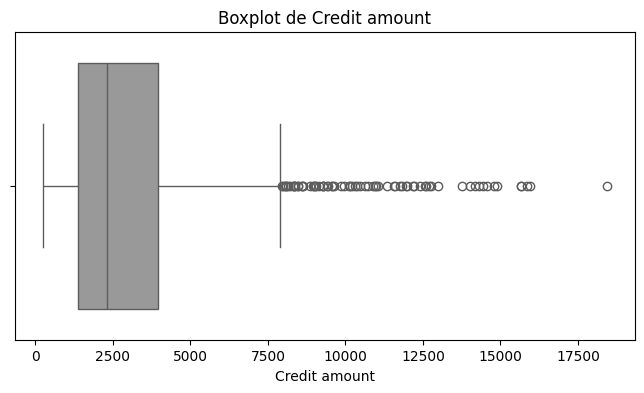

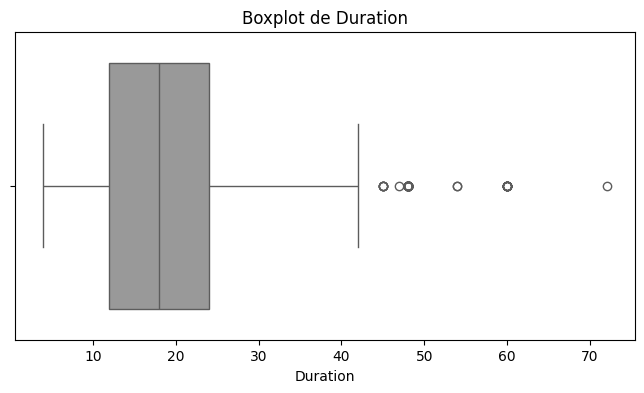

In [7]:
# Boxplot para Credit amount
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Credit amount', color="#999999")
plt.title('Boxplot de Credit amount')
plt.show()

# Boxplot para Duration
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Duration', color="#999999")
plt.title('Boxplot de Duration')
plt.show()

#### Análisis de los Boxplots
El análisis de los boxplots revela la distribución y la presencia de valores atípicos en las variables Credit amount y Duration. En el caso del monto del crédito, se observa una amplia dispersión de los datos, con algunos valores extremos significativamente elevados (outliers) que llegan hasta 18,424 DM, lo que indica que hay ciertos créditos con montos mucho mayores que la mayoría. La mayor concentración de créditos se encuentra en la parte inferior del rango, lo que sugiere que la mayoría de los préstamos son de montos relativamente pequeños. Por otro lado, el boxplot de la duración del crédito muestra que la mayoría de los préstamos tienen una duración entre 12 y 24 meses, aunque también existen algunos créditos con duraciones significativamente más largas (hasta 72 meses), indicando observaciones atípicas.

### Grafico de barras 

#### Distribución de la edad de las personas que piden un préstamo 

   Age Group  Frecuencia
0      18-22         105
1      24-28         229
2      29-33         182
3      34-38         164
4      39-43         102
5      44-48          79
6      49-53          50
7      54-58          35
8      59-63          26
9      64-68          21
10     69-73           7


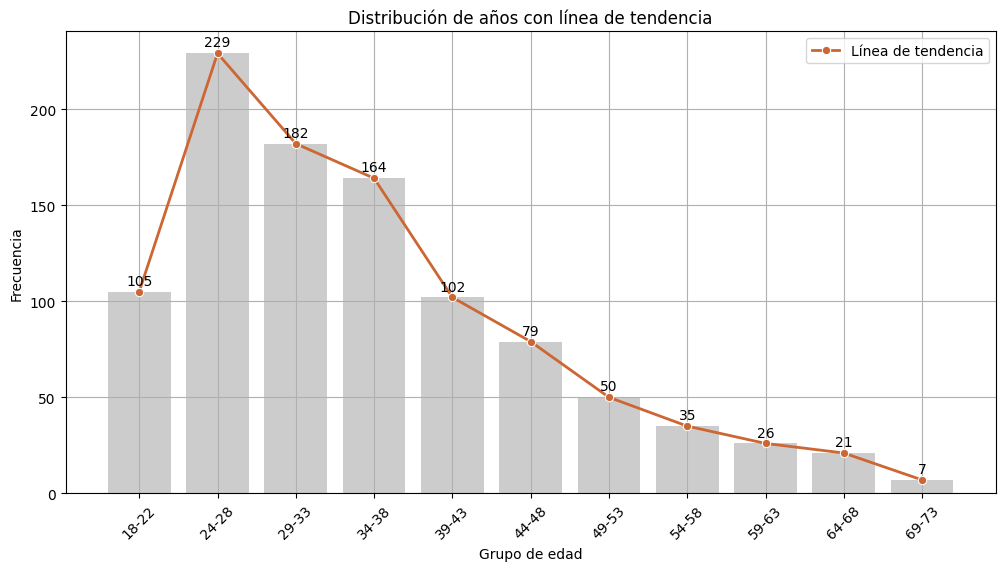

In [8]:

# Agrupamos los datos por intervalos de edad.
bins = [18, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 80]
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Crear una nueva columna 'Age Group' con los grupos de edad.
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar la frecuencia de cada grupo de edad
age_distribution = df['Age Group'].value_counts().sort_index()

# Ver la distribución como tabla ordenada
print(age_distribution.reset_index(name='Frecuencia'))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, color='#CCCCCC')

# Añadir etiquetas encima de cada barra
for index, value in enumerate(age_distribution.values):
    plt.text(index, value + 2, str(value), ha='center', va='bottom', fontsize=10)

# Calcular y graficar la línea de tendencia
sns.lineplot(x=age_distribution.index, y=age_distribution.values, 
             color='#CC6633', marker='o', linewidth=2, label='Línea de tendencia')

# Etiquetas y título
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de años con línea de tendencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend()

# Mostrar la cuadrícula y la gráfica
plt.grid()
plt.show()


La distribución muestra que el grupo más numeroso es el de 24-28 años con 229 individuos, seguido por el de 29-33 años con 182, lo que sugiere que las personas jóvenes predominan en la muestra. A partir de los 34 años, se observa una disminución constante en la frecuencia, destacando que los grupos de 49 años en adelante presentan una baja representación, especialmente los mayores de 64 años, donde las observaciones caen a menos de 30. 

#### 	Distribución del monto del crédito 

  Credit Amount Group  Frecuencia
0              0-2000         432
1           2000-4000         322
2           4000-6000          97
3           6000-8000          79
4          8000-10000          30
5         10000-12000          19
6         12000-14000           9
7         14000-16000          11
8         16000-18000           0
9         18000-20000           1


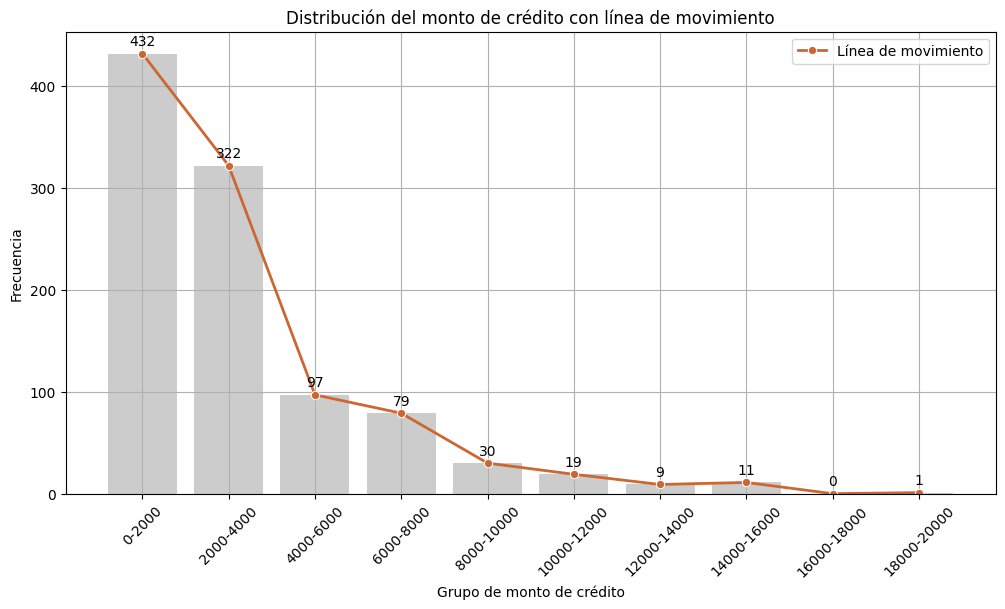

In [9]:

# Suponiendo que tu DataFrame se llama 'df' y tiene una columna 'Credit amount'.
# Agrupamos los datos por rangos del monto del crédito en intervalos de 2000.
bins = range(0, int(df['Credit amount'].max()) + 2000, 2000)
labels = [f'{i}-{i+2000}' for i in bins[:-1]]

# Crear una nueva columna 'Credit Amount Group' con los grupos de monto de crédito.
df['Credit Amount Group'] = pd.cut(df['Credit amount'], bins=bins, labels=labels, right=False)

# Contar la frecuencia de cada grupo de monto de crédito
credit_distribution = df['Credit Amount Group'].value_counts().sort_index()

# Ver la distribución como tabla organizada
print(credit_distribution.reset_index(name='Frecuencia'))

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=credit_distribution.index, y=credit_distribution.values, color='#CCCCCC')

# Añadir etiquetas de valor encima de cada barra
for index, value in enumerate(credit_distribution.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Calcular y graficar la línea de tendencia (línea de movimiento)
sns.lineplot(x=credit_distribution.index, y=credit_distribution.values, 
             color='#CC6633', marker='o', linewidth=2, label='Línea de movimiento')

# Etiquetas y título
plt.xlabel('Grupo de monto de crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución del monto de crédito con línea de movimiento')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.legend()

# Mostrar la cuadrícula y la gráfica
plt.grid()
plt.show()


La distribución del monto de crédito revela que la mayoría de los créditos otorgados están concentrados en los rangos más bajos. El grupo de 0-2000 de marcos alemanes tiene la mayor frecuencia, con 432 casos, seguido por el rango de 2000-4000 con 322 casos, lo que sugiere que los créditos de menor valor son los más comunes. A medida que el monto del crédito aumenta, la frecuencia disminuye considerablemente, con solo 97 créditos en el rango de 4000-6000 y 79 en el de 6000-8000. A partir del rango de 8000-10000, las frecuencias son aún más bajas, con menos de 20 créditos por grupo, y solo 1 crédito registrado en el rango más alto de 18000-20000. Además, el rango de 16000-18000 no presenta ningún crédito.


#### Estos gráficos de barras de Saving accounts y Checking account.

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


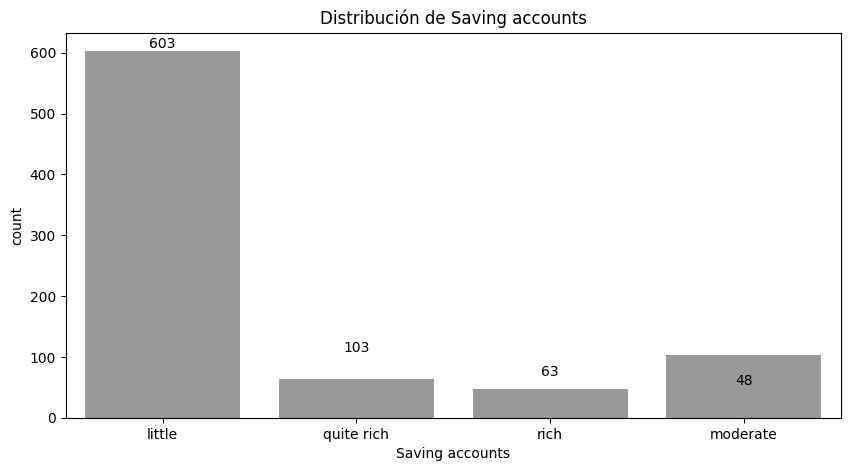

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


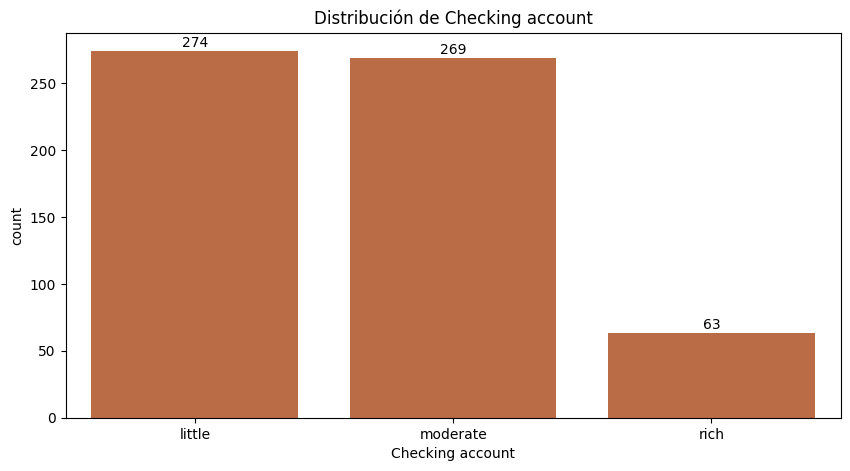

In [10]:
# Ver cantidades para Saving accounts
saving_counts = df['Saving accounts'].value_counts()
print(saving_counts)

# Gráfico de barras para Saving accounts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Saving accounts', color="#999999")
plt.title('Distribución de Saving accounts')

# Añadir etiquetas de cantidad encima de las barras
for index, value in enumerate(saving_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

# Ver cantidades para Checking account
checking_counts = df['Checking account'].value_counts()
print(checking_counts)

# Gráfico de barras para Checking account
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Checking account', color="#CC6633")
plt.title('Distribución de Checking account')

# Añadir etiquetas de cantidad encima de las barras
for index, value in enumerate(checking_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


La distribución de las cuentas de ahorro muestra que la mayoría de las personas tiene recursos limitados, con 603 casos en la categoría "little" y 103 en "moderate", mientras que solo 63 y 48 individuos se ubican en los niveles "quite rich" y "rich", respectivamente, reflejando una concentración en niveles bajos de ahorro. De manera similar, en las cuentas corrientes, los saldos son predominantemente bajos, con 274 casos en "little" y 269 en "moderate", dejando solo 63 personas en la categoría "rich". En ambas cuentas se observa una tendencia hacia recursos financieros reducidos o moderados, con una minoría con acceso a altos niveles de ahorro o liquidez.
* En la cuentas de ahorro Tenemos problemas con el código porque la gráfica no representa los datos correctamente. 

### Crédito por género 

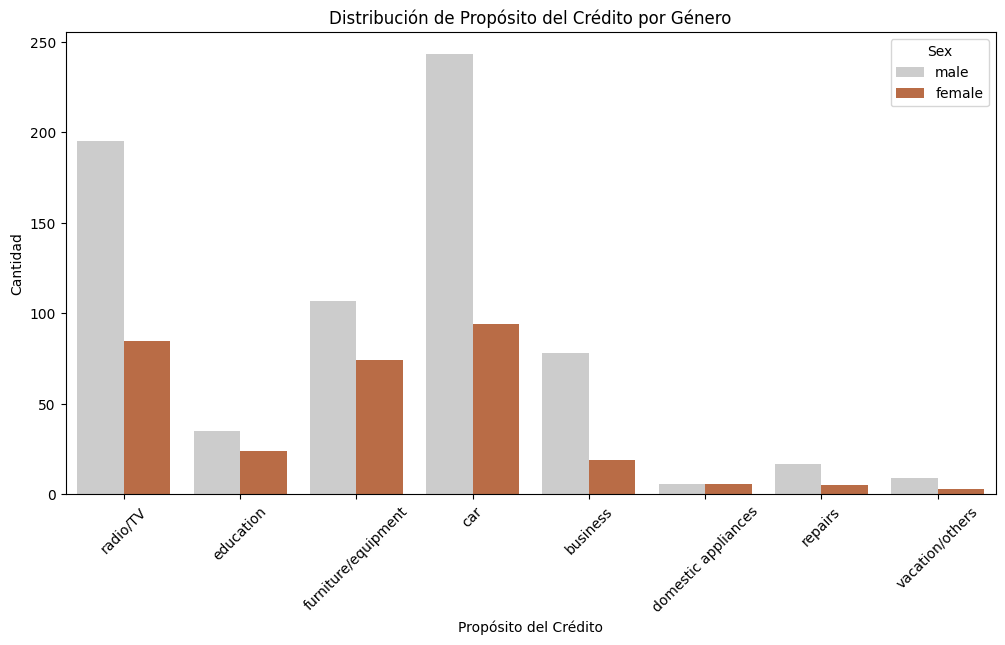

       Sex              Purpose  Count  Percentage
0   female             business     19    6.129032
1   female                  car     94   30.322581
2   female  domestic appliances      6    1.935484
3   female            education     24    7.741935
4   female  furniture/equipment     74   23.870968
5   female             radio/TV     85   27.419355
6   female              repairs      5    1.612903
7   female      vacation/others      3    0.967742
8     male             business     78   11.304348
9     male                  car    243   35.217391
10    male  domestic appliances      6    0.869565
11    male            education     35    5.072464
12    male  furniture/equipment    107   15.507246
13    male             radio/TV    195   28.260870
14    male              repairs     17    2.463768
15    male      vacation/others      9    1.304348


In [11]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras agrupado por 'Sex' y 'Purpose'
sns.countplot(data=df, x='Purpose', hue='Sex', palette=("#CCCCCC", "#CC6633") )

# Personalización del gráfico
plt.title('Distribución de Propósito del Crédito por Género')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.xlabel('Propósito del Crédito')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

# Agrupar por 'Sex' y 'Purpose' y contar las observaciones
valores_exactos = df.groupby(['Sex', 'Purpose']).size().reset_index(name='Count')

# Calcular el total de observaciones por cada género
total_por_genero = valores_exactos.groupby('Sex')['Count'].transform('sum')

# Añadir una columna con el porcentaje
valores_exactos['Percentage'] = (valores_exactos['Count'] / total_por_genero) * 100

# Mostrar los valores exactos con porcentaje
print(valores_exactos)




* La distribución de porcentual esta distribuida en cada uno de los sexos. 

Tanto hombres como mujeres concentran sus créditos en propósitos relacionados con la compra de vehículos, productos electrónicos y mobiliario, mientras que créditos para electrodomésticos, vacaciones y reparaciones son menos frecuentes. Sin embargo, los hombres tienen una mayor proporción de créditos para negocios y educación en comparación con las mujeres.

### Grafico de torta 

                    Descripción  Casos
0                    Calificado    630
1     No calificado y residente    200
2          Altamente calificado    148
3  No calificado y no residente     22


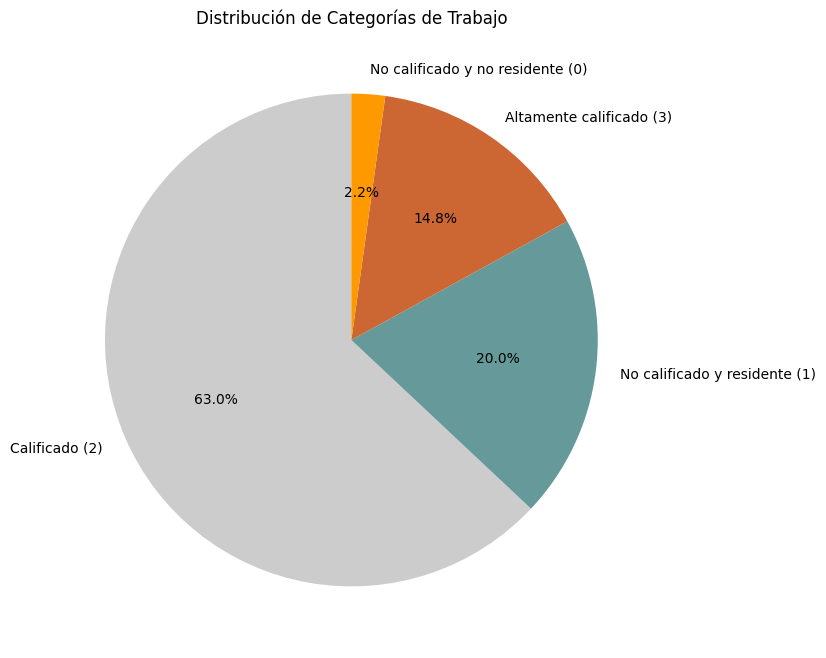

In [12]:

# Calcular los valores únicos de la variable 'Job' y sus frecuencias
valores_job = df['Job'].value_counts()

# Diccionario con las descripciones de los trabajos
descripciones = {
    0: 'No calificado y no residente',
    1: 'No calificado y residente',
    2: 'Calificado',
    3: 'Altamente calificado'
}

# Crear un DataFrame con la descripción y cantidad de casos
tabla_valores = pd.DataFrame({
    'Descripción': [descripciones[job] for job in valores_job.index],
    'Casos': valores_job.values
})

# Mostrar la tabla en consola
print(tabla_valores)

# Crear el gráfico de torta sin mostrar las cantidades en las etiquetas
etiquetas = [f"{descripciones[job]} ({job})" for job in valores_job.index]

plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(
    valores_job, 
    labels=etiquetas, 
    autopct='%1.1f%%',  # Mostrar porcentaje con un decimal
    startangle=90,  # Rotar para que comience en la parte superior
    colors=['#CCCCCC', '#669999', '#CC6633', '#FF9900']  # Colores personalizados
)

# Añadir título
plt.title('Distribución de Categorías de Trabajo')

# Mostrar el gráfico
plt.show()


 la mayoría de los individuos (630 casos, 63%) pertenecen a la categoría de trabajos calificados, lo que sugiere una predominancia de personas con habilidades especializadas en el conjunto de datos. En segundo lugar, se encuentran los trabajadores no calificados y residentes (200 casos, 20%), representando una parte significativa pero menor del total. Por otro lado, 148 individuos (14.8%) se identifican como altamente calificados, lo que refleja la presencia de un grupo más reducido pero relevante de profesionales con alta especialización. Finalmente, la categoría menos frecuente es la de trabajadores no calificados y no residentes, con solo 22 casos (2.2%), lo que indica una baja participación de este grupo en la muestra. Esta distribución sugiere una mayor proporción de personas empleadas en ocupaciones con algún grado de habilidad técnica o profesional.

### Mapa de calor 

Saving accounts  little  moderate  quite rich  rich
Job                                                
0                    13         0           3     1
1                   128        23          12     8
2                   366        66          42    36
3                    96        14           6     3


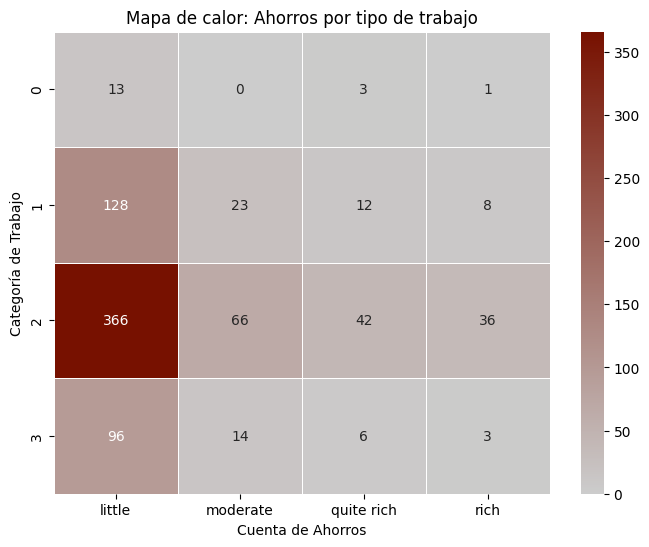

In [13]:

# Crear una tabla cruzada entre 'Job' y 'Saving accounts'
tabla = pd.crosstab(df['Job'], df['Saving accounts'])
print(tabla)

# Crear un gradiente de colores personalizado entre #CCCCCC y #CC6633
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#CCCCCC", "#771100"])

# Crear el heatmap usando seaborn con los colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(tabla, annot=True, cmap=cmap, fmt='d', linewidths=0.5, linecolor='white')

# Añadir título y etiquetas
plt.title('Mapa de calor: Ahorros por tipo de trabajo')
plt.xlabel('Cuenta de Ahorros')
plt.ylabel('Categoría de Trabajo')

# Mostrar gráfico
plt.show()




las cuentas de ahorro revela patrones significativos en la capacidad de ahorro de los trabajadores. Los no calificados y no residentes (Job = 0) tienen una escasa participación en todas las categorías de ahorro, mostrando solo 13 cuentas en "little" y un número marginal en las categorías más altas. Por otro lado, los no calificados y residentes (Job = 1) concentran la mayoría de sus cuentas en las categorías "little" (128) y "moderate" (23), sugiriendo que, aunque tienen algo más de capacidad de ahorro, aún se mantienen en niveles bajos. Los trabajadores calificados (Job = 2) destacan con una mayor capacidad de ahorro, predominando en las categorías más altas: "moderate" (66), "quite rich" (42), y "rich" (36). Finalmente, los altamente calificados (Job = 3) presentan una proporción significativa en la categoría "little" (96), pero también muestran un segmento con capacidad de ahorro en niveles más altos, reflejando cómo las habilidades y el tipo de empleo impactan en la acumulación de capital.

### Regresión 

Coeficiente: 8.118332459670789
Intercepto: 2982.683754388542


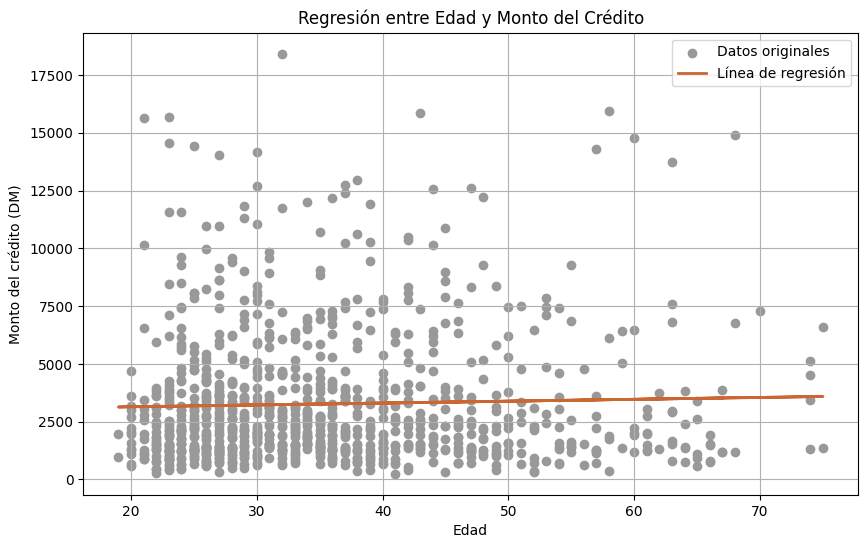

In [14]:
# Transformar variables para scikit-learn
X = df[['Age']]  # La variable independiente debe ser 2D
y = df['Credit amount']

# Inicializar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f'Coeficiente: {coeficiente}')
print(f'Intercepto: {intercepto}')

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(df['Age'], df['Credit amount'], color='#999999', label='Datos originales')

# Graficar la línea de regresión
plt.plot(df['Age'], modelo.predict(df[['Age']]), color='#CC6633', linewidth=2, label='Línea de regresión')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Monto del crédito (DM)')
plt.title('Regresión entre Edad y Monto del Crédito')
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.show()

El modelo de regresión lineal entre la edad y el monto del crédito muestra un coeficiente de aproximadamente 8.12, lo que indica que, en promedio, por cada año adicional de edad, el monto del crédito aumenta en 8.12 unidades monetarias. El intercepto de aproximadamente 2982.68 representa el monto del crédito estimado cuando la edad es 18 años. 

Coeficiente: 146.29679810966093
Intercepto: 213.2160291137575


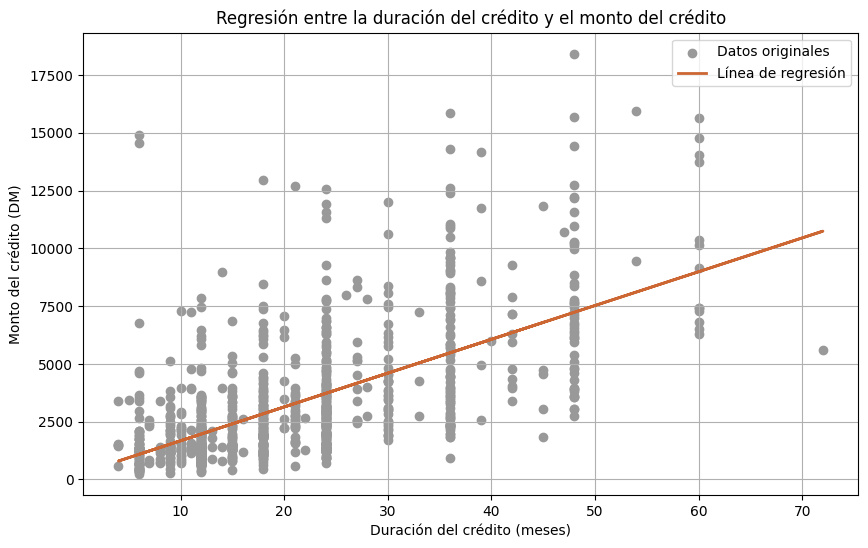

In [15]:
# Transformar variables para scikit-learn
x = df[['Duration']]  # La variable independiente debe ser 2D
y = df['Credit amount']  # Variable dependiente

# Inicializar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(x, y)

# Obtener los coeficientes
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f'Coeficiente: {coeficiente}')
print(f'Intercepto: {intercepto}')


# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(df['Duration'], df['Credit amount'], color='#999999', label='Datos originales')

# Graficar la línea de regresión
plt.plot(df['Duration'], modelo.predict(df[['Duration']]), color='#CC6633', linewidth=2, label='Línea de regresión')

# Etiquetas y título
plt.xlabel('Duración del crédito (meses)')
plt.ylabel('Monto del crédito (DM)')
plt.title('Regresión entre la duración del crédito y el monto del crédito')
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.show()

El modelo de regresión lineal que relaciona la duración del crédito con el monto del crédito muestra un coeficiente de aproximadamente 146.30. Esto implica que, en promedio, por cada mes adicional de duración del crédito, el monto del crédito aumenta en aproximadamente 146.30 unidades monetarias. El intercepto de aproximadamente 213.22 representa el monto del crédito estimado cuando la duración es de 0 meses, aunque este valor puede no tener un significado práctico en este contexto.